In [3]:
import pandas as pd
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

7. Attribute Information:

   1. Wife's age                     (numerical)
   2. Wife's education               (categorical)      1=low, 2, 3, 4=high
   3. Husband's education            (categorical)      1=low, 2, 3, 4=high
   4. Number of children ever born   (numerical)
   5. Wife's religion                (binary)           0=Non-Islam, 1=Islam
   6. Wife's now working?            (binary)           0=Yes, 1=No
   7. Husband's occupation           (categorical)      1, 2, 3, 4
   8. Standard-of-living index       (categorical)      1=low, 2, 3, 4=high
   9. Media exposure                 (binary)           0=Good, 1=Not good
   10. Contraceptive method used     (class attribute)  1=No-use 
                                                        2=Long-term
                                                        3=Short-term


In [4]:
contraceptive= pd.read_csv("./cmc.csv")
contraceptive

,Wife age,Wife education,Husband education,No Children,wife religion,Wife working,husband ocupation,living standard,media exposure,Contraceptive method
0,24,2,3,3,1,1,2,3,0,1
1,45,1,3,10,1,1,3,4,0,1
2,43,2,3,7,1,1,3,4,0,1
3,42,3,2,9,1,1,3,3,0,1
4,36,3,3,8,1,1,3,2,0,1
...,...,...,...,...,...,...,...,...,...,...
1468,33,4,4,2,1,0,2,4,0,3
1469,33,4,4,3,1,1,1,4,0,3
1470,39,3,3,8,1,0,1,4,0,3
1471,33,3,3,4,1,0,2,2,0,3


In [5]:
contraceptive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1473 entries, 0 to 1472
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   Wife age              1473 non-null   int64
 1   Wife education        1473 non-null   int64
 2   Husband education     1473 non-null   int64
 3   No Children           1473 non-null   int64
 4   wife religion         1473 non-null   int64
 5   Wife working          1473 non-null   int64
 6   husband ocupation     1473 non-null   int64
 7   living standard       1473 non-null   int64
 8   media exposure        1473 non-null   int64
 9   Contraceptive method  1473 non-null   int64
dtypes: int64(10)
memory usage: 115.2 KB


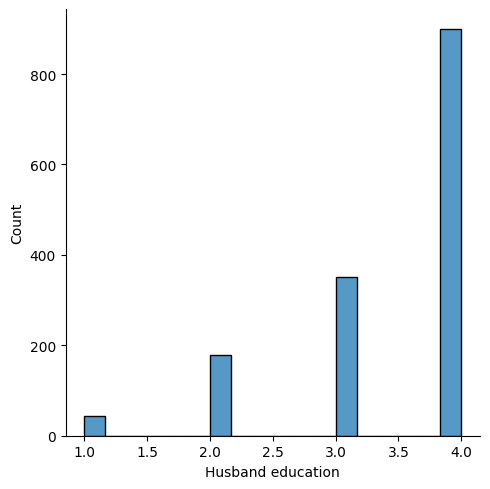

In [6]:
sns.displot(contraceptive['Husband education'])

<AxesSubplot:xlabel='No Children', ylabel='Husband education'>

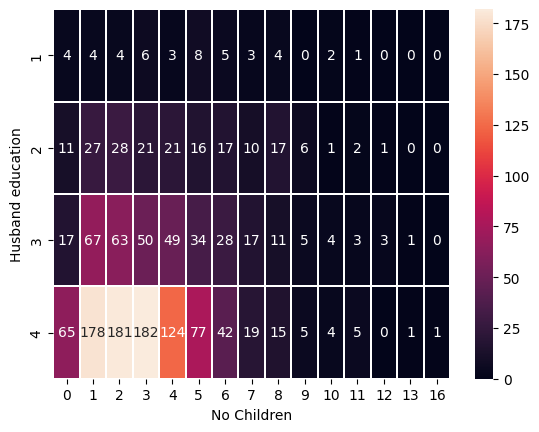

In [7]:
#compare Husband education to number of children
sns.heatmap(pd.crosstab(contraceptive['Husband education'],contraceptive['No Children']),annot=True,linewidth=.1,fmt=".0f")

<AxesSubplot:xlabel='No Children', ylabel='Wife education'>

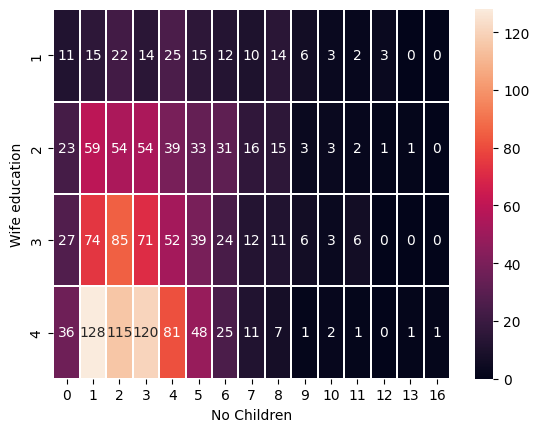

In [8]:
#compare wifes education to number of children
sns.heatmap(pd.crosstab(contraceptive['Wife education'],contraceptive['No Children']),annot=True,linewidth=.1,fmt=".0f")

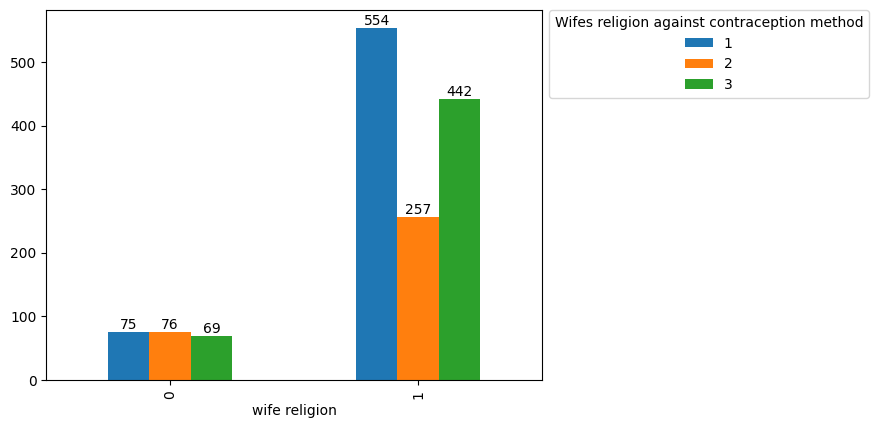

In [10]:
#compare wifes religion to contraception

# 5. Wife's religion                (binary)           0=Non-Islam, 1=Islam
#10. Contraceptive method used     (class attribute)  1=No-use  2=Long-term  3=Short-term

ct=pd.crosstab(contraceptive['wife religion'],contraceptive['Contraceptive method'])
ax=ct.plot(kind="bar")
ax.legend(title="Wifes religion against contraception method",loc="upper left",bbox_to_anchor=(1, 1.02))
for c in ax.containers:
    
    # set the bar label
    ax.bar_label(c)

In [11]:
y=contraceptive['Contraceptive method']
x=contraceptive.drop(labels=['Contraceptive method'],axis=1)

In [12]:
#splitting data
#stratify - introduced in classification during cross validation will create a balance of data i.e balance number of values of 1s or 0s
from sklearn.preprocessing import StandardScaler
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0,stratify=y )
scaler=StandardScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.fit_transform(x_test)


In [13]:
x_train.shape

(1178, 9)

In [14]:
import tensorflow as tf
from tensorflow import keras

from keras import Sequential, Model #research on model for custom built neural networks
from keras.layers import  Dense,Input

In [15]:
#neural networks have input layer and output layer
#input layer takes in features, output layer provides prediction
#each neuron in input layer takes features independent of the other. TheANN in this case will have 9 input neurons
#output layer has no of neurons equal to target i.e method of contraception
#in regression output layer has one neuron
#regresssion -
#binary class -sigmoid function, dense =1
#multiclass - softmax function, dense=
#regression - linear fuction, dense=1

In [16]:
#input layer number of neurons
x_train.shape[1]

9

In [28]:
#when working with keras we use Dense function to interconnect nurons in successiding layers to all neurons in the previous layer
#relu function enables learning and foward propergation of data
#sequential method used for deep feed foward neural networks
model=Sequential()

model.add(Input(x.shape[1]))#input Layer
model.add(Dense(20,activation='relu'))#Dense has 2 parameters: number of neurons and activation function
model.add(Dense(20,activation='relu'))
model.add(Dense(20,activation='relu'))
model.add(Dense(20,activation='relu'))#hidden layers
model.add(Dense(20,activation='relu'))
model.add(Dense(20,activation='relu'))
model.add(Dense(20,activation='relu'))
model.add(Dense(20,activation='relu'))
model.add(Dense(20,activation='relu'))
model.add(Dense(20,activation='relu'))
model.add(Dense(20,activation='relu'))
model.add(Dense(4, activation='softmax'))#output layer 

#model compiler does back propergation. It takes values of y and y predict. to estimate level of error in model called loss
# loss function calculates error- binary crossentropy, sparse categorical cross entropy
#accuracy function gives accuracy(accuracy, recall, f1 score) for classification model and optimizer for regression
#This formula then tunes to reduce this loss through a process called epochs(i.e foward feeding and back propergation 10 times)
opt=tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer=opt,loss='sparse_categorical_crossentropy', metrics=['sparse_categorical_accuracy'])

In [41]:
%%time
#fitting the model
#provide train data(x and y)
#epochs specify how many times to learn from data foward feeding and back propergation
#verbose specifys display of training data and metrics
#batch size specify number of times to split data to learn from in batches
#validation_split this is used to split a section of data to validate results of model
#validation_data- used in place of validation split does same work as validation_split- use tuple
model.fit(x_train,y_train,batch_size=10,epochs=20,verbose=1,validation_data=(x_test,y_test),callbacks=[callbacks])

Epoch 1/20
118/118 [==============================] - 1s 5ms/step - loss: 0.8140 - sparse_categorical_accuracy: 0.6163 - val_loss: 0.9494 - val_sparse_categorical_accuracy: 0.5288
Epoch 2/20
118/118 [==============================] - 1s 4ms/step - loss: 0.8143 - sparse_categorical_accuracy: 0.6163 - val_loss: 0.9509 - val_sparse_categorical_accuracy: 0.5254
Epoch 3/20
118/118 [==============================] - 0s 4ms/step - loss: 0.8129 - sparse_categorical_accuracy: 0.6061 - val_loss: 0.9509 - val_sparse_categorical_accuracy: 0.5458
Epoch 4/20
118/118 [==============================] - 0s 4ms/step - loss: 0.8110 - sparse_categorical_accuracy: 0.6171 - val_loss: 0.9545 - val_sparse_categorical_accuracy: 0.5186
Epoch 5/20
118/118 [==============================] - 0s 4ms/step - loss: 0.8082 - sparse_categorical_accuracy: 0.6154 - val_loss: 0.9531 - val_sparse_categorical_accuracy: 0.5322
Epoch 6/20
118/118 [==============================] - 0s 4ms/step - loss: 0.8081 - sparse_categorica

In [39]:
#model with callback
#callback indicates when model trains and gets to lowest error(define the error). stop trainingat at that point
class MyCallback(tf.keras.callbacks.Callback):
    def on_epoch_end (self,epoch, logs=()):
        if (logs.get('val_sparse_categorical_accuracy')==0.5):
            self.model.stop_training=True

In [19]:
#assign function to variable
callbacks=MyCallback()

In [134]:
#evaluate model performance
model.evaluate(x_test,y_test)

10/10 [==============================] - 0s 2ms/step - loss: 0.9915 - sparse_categorical_accuracy: 0.5356


[0.9914681911468506, 0.5355932116508484]

In [152]:
from sklearn.ensemble import RandomForestClassifier
clf=RandomForestClassifier()
clf.fit(x_train,y_train)


RandomForestClassifier()

In [156]:
from sklearn.metrics import accuracy_score
ypred=clf.predict(x_test)
accuracy_score(y_test,ypred)


0.5254237288135594